# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [78]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    # print(lat_lng)
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [79]:
print(cities)

['port mathurin', 'basco', 'susuman', 'hawaiian paradise park', 'nantucket', 'puerto natales', 'port-aux-francais', 'ushuaia', "nuku'alofa", 'college', 'puerto san carlos', 'edinburgh of the seven seas', 'kencong', 'port elizabeth', 'west island', 'albany', 'vingt cinq', 'wailua homesteads', "st. john's", 'argo', 'talnakh', 'pajapan', 'chonchi', 'blackmans bay', 'melekeok village', 'pitanga', 'el granada', 'xai-xai', 'bondo', 'homer', 'mitsamiouli', 'qui nhon', 'kaa-khem', 'adamstown', 'klyuchi', 'ribeira brava', 'yellowknife', 'ha giang', 'iskateley', 'walvis bay', 'banda aceh', 'vilyuysk', 'anadyr', 'olonkinbyen', 'ust-nera', 'hasaki', 'mancora', 'petropavlovsk-kamchatsky', 'gadzhiyevo', 'bilibino', 'tiksi', 'atafu village', 'brigantine', 'currais novos', 'fisterra', 'kingston', 'luderitz', 'tondano', 'nogliki', 'saipan', 'daud khel', 'carnarvon', 'holualoa', 'longido', 'mili', 'margaret river', 'wynyard', 'bethel', 'legden', 'papatowai', 'okhotsk', 'ilulissat', 'tocopilla', 'ribeira

In [81]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# city_url = f"{url}appid={weather_api_key}&q={cities[0]}"
# city_weather = requests.get(city_url).json()
# print(json.dumps(city_weather, indent=4, sort_keys=True))
# print(f"lat = {city_weather['coord']['lat']}")
# print(f"lon = {city_weather['coord']['lon']}")
# print(f"max temp = {city_weather['main']['temp_max']}")
# print(f"humidity = {city_weather['main']['humidity']}")
# print(f"clouds = {city_weather['clouds']['all']}")
# print(f"wind = {city_weather['wind']['speed']}")
# print(f"country = {city_weather['sys']['country']}")
# print(f"date = {city_weather['dt']}")

units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | basco
Processing Record 3 of Set 1 | susuman
Processing Record 4 of Set 1 | hawaiian paradise park
Processing Record 5 of Set 1 | nantucket
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | nuku'alofa
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | kencong
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | st. john's
Processing Record 20 of Set 1 | argo

In [82]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [83]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,24.34,76,7,3.25,MU,1698538794
1,basco,20.4487,121.9702,26.00,80,9,6.14,PH,1698539324
2,susuman,62.7833,148.1667,-17.23,99,93,0.45,RU,1698538854
3,hawaiian paradise park,19.5933,-154.9731,28.73,71,0,3.60,US,1698538849
4,nantucket,41.2835,-70.0995,19.08,93,0,4.63,US,1698539325


In [84]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [85]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,24.34,76,7,3.25,MU,1698538794
1,basco,20.4487,121.9702,26.00,80,9,6.14,PH,1698539324
2,susuman,62.7833,148.1667,-17.23,99,93,0.45,RU,1698538854
3,hawaiian paradise park,19.5933,-154.9731,28.73,71,0,3.60,US,1698538849
4,nantucket,41.2835,-70.0995,19.08,93,0,4.63,US,1698539325


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

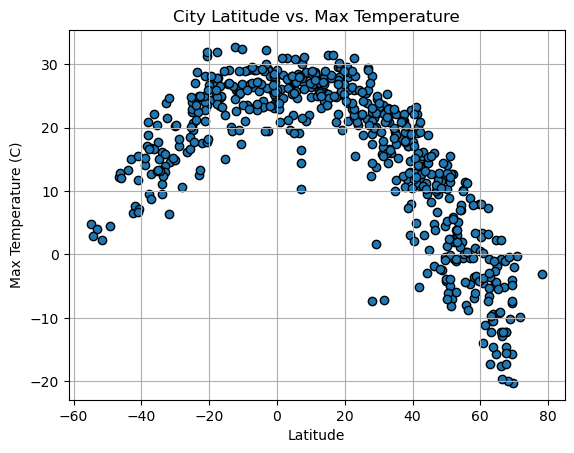

In [86]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

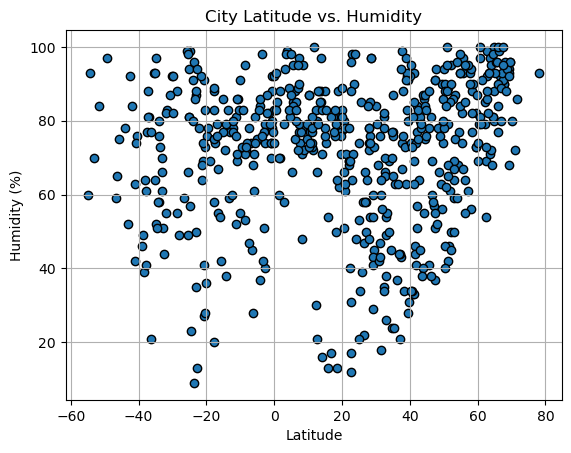

In [87]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

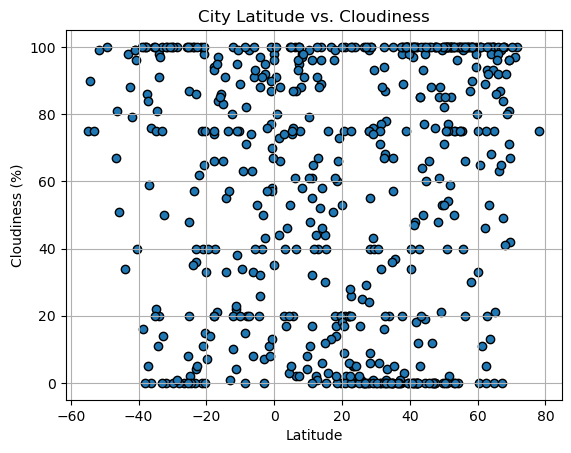

In [90]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

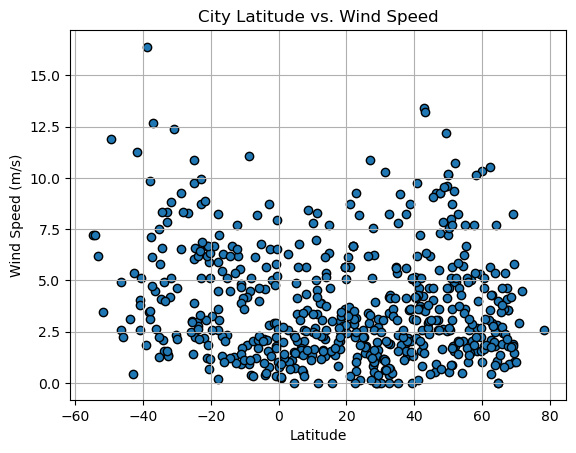

In [91]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [92]:
# Define a function to create Linear Regression plots
def plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(line_eq_x,line_eq_y),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [100]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,basco,20.4487,121.9702,26.00,80,9,6.14,PH,1698539324
2,susuman,62.7833,148.1667,-17.23,99,93,0.45,RU,1698538854
3,hawaiian paradise park,19.5933,-154.9731,28.73,71,0,3.60,US,1698538849
4,nantucket,41.2835,-70.0995,19.08,93,0,4.63,US,1698539325
9,college,64.8569,-147.8028,-1.72,80,75,0.00,US,1698538841


In [101]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,24.34,76,7,3.25,MU,1698538794
5,puerto natales,-51.7236,-72.4875,2.31,84,99,3.46,CL,1698538789
6,port-aux-francais,-49.3500,70.2167,4.45,97,100,11.92,TF,1698538788
7,ushuaia,-54.8000,-68.3000,4.81,60,75,7.20,AR,1698539284
8,nuku'alofa,-21.1333,-175.2000,28.19,69,40,6.69,TO,1698539326


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7591264923549048


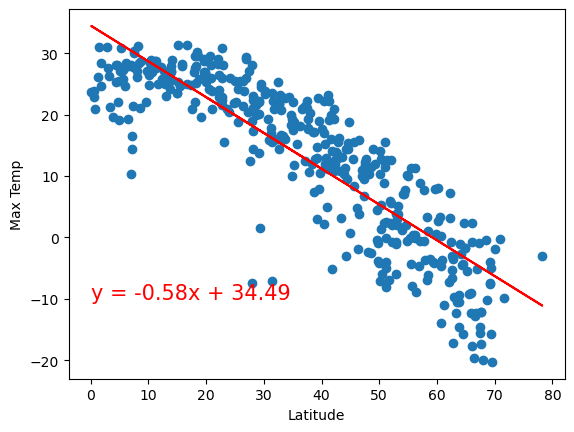

In [104]:
# Linear regression on Northern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Latitude","Max Temp",0,-10)

The r-squared is: 0.6249830708743938


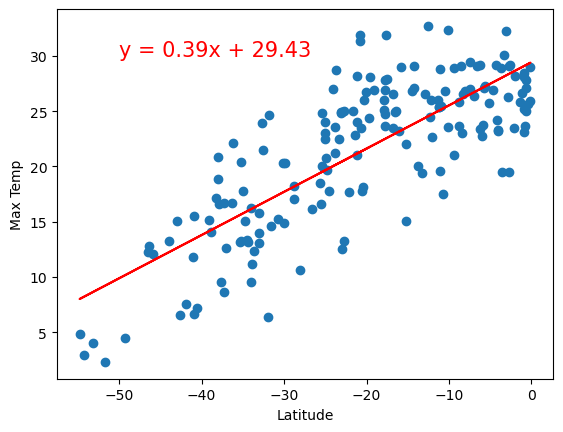

In [105]:
# Linear regression on Southern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Latitude","Max Temp",-50,30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.024208318483490022


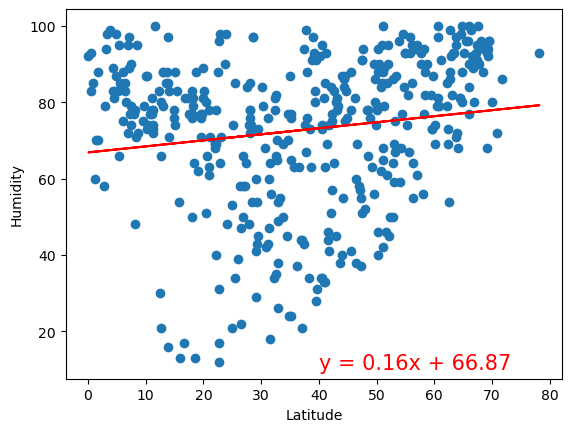

In [106]:
# Northern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Latitude","Humidity",40,10)

The r-squared is: 0.0037917829507327794


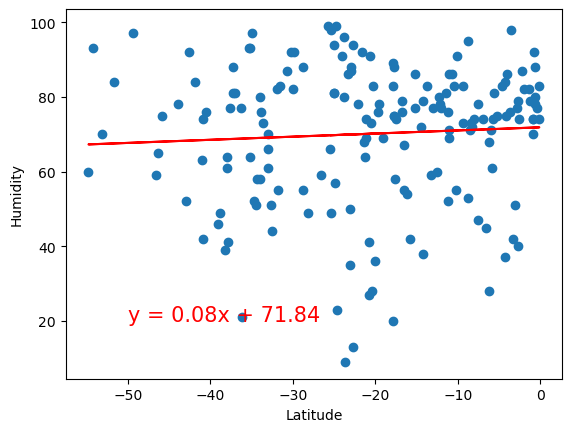

In [107]:
# Southern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Latitude","Humidity",-50,20)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05326236902199101


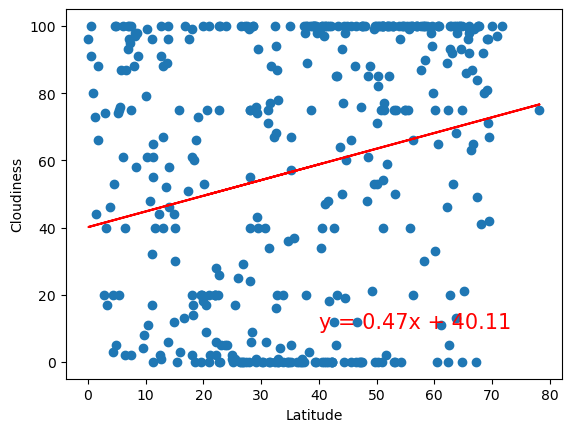

In [108]:
# Northern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Latitude","Cloudiness",40,10)

The r-squared is: 0.014543194922415294


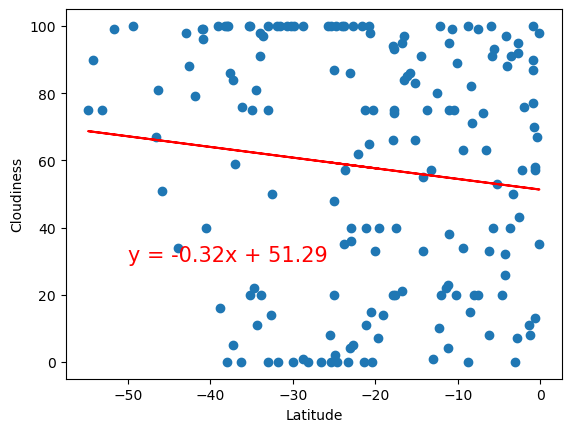

In [109]:
# Southern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Latitude","Cloudiness",-50,30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.019141604076406252


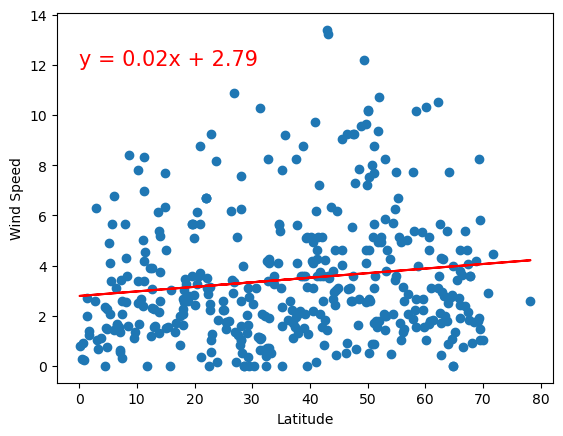

In [110]:
# Northern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Latitude","Wind Speed",0,12)

The r-squared is: 0.071586342610305


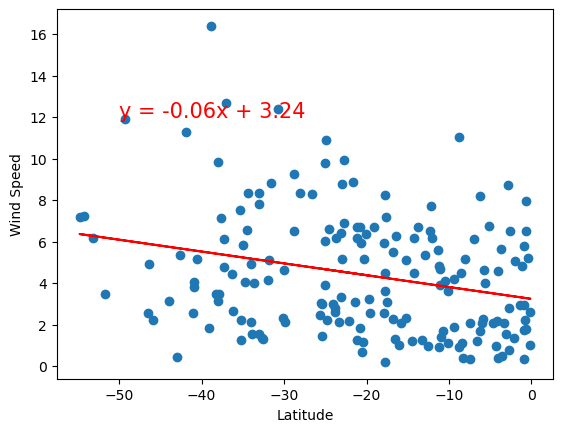

In [111]:
# Southern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Latitude","Wind Speed",-50,12)

**Discussion about the linear relationship:** YOUR RESPONSE HERE